In [2]:
'''import packages'''

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import skimage
from retinaface import RetinaFace
import matplotlib.image as mpimg
from sklearn import decomposition, svm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import csv
import pandas as pd
import mediapipe as mp

In [3]:
'''Import faces'''

faces = []
target = []
dir = os.getcwd()
for folder in os.listdir(dir + '\\testdata\\test'):
    print(folder)
    i = 0
    for face in os.listdir(dir + '\\testdata\\test\\' + folder):
        i +=1
        image = cv2.imread(dir + '\\testdata\\test' + "\\" + folder + "\\" + face)
        im = skimage.color.rgb2gray(image)
        img = cv2.resize(im,(380,380))
        faces.append(img)
    print(str(i)+" Faces")
print("Done processing...")



#import labels for faces
for file in os.listdir(dir + '\\testdata\\testlabel'):
    file = open(dir + '\\testdata\\testlabel\\' + file,"r")
    t = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
   
    target += t[0]
    file.close()
    
    print("targets leangth: " + str(len(target)))
print("faces leangth: " + str(len(faces)))


Facialispares 0 - Andrei - 1
289 Faces
Facialispares 0 - Elsa - 1
323 Faces
Facialispares 0 - Nathalie - 1
230 Faces
Facialispares 0 - Oskar - 1
334 Faces
Facialispares 0 - Viktor - 1
256 Faces
Facialispares 1 - Andrei - 1
150 Faces
Facialispares 1 - Andrei - 2
130 Faces
Facialispares 1 - Nathalie - 1
89 Faces
Facialispares 1 - Nathalie - 2
110 Faces
Facialispares 1 - Oskar - 1
112 Faces
Facialispares 1 - Oskar - 2
146 Faces
Facialispares 1 - Viktor - 1
113 Faces
Facialispares 1 - Viktor - 2
119 Faces
Facialispares 3 - Andrei - 1
131 Faces
Facialispares 3 - Andrei - 2
172 Faces
Facialispares 3 - Nathalie - 1
58 Faces
Facialispares 3 - Nathalie - 2
91 Faces
Facialispares 3 - Oskar - 2
126 Faces
Facialispares 3 - Oskar - 3
100 Faces
Facialispares 3 - Viktor - 1
110 Faces
Facialispares 3 - Viktor - 2
119 Faces
Done processing...
targets leangth: 289
targets leangth: 612
targets leangth: 842
targets leangth: 1176
targets leangth: 1432
targets leangth: 1582
targets leangth: 1712
targets lea

In [4]:
'''create a dataframe'''
face_data = []

for face in faces:
    f = face.ravel()
    face_data.append(f)
    
print(len(face_data))

df = { 'faces': faces,
      'target':target,
      'data': face_data 
}

df = pd.DataFrame(df) 
print(str(len(faces)) + " Faces in dataframe")
print(str(len(face_data[0])) + " Features in a face")


3308
3308 Faces in dataframe
144400 Features in a face


In [5]:

"create a training and test set"

h,w = df.faces[0].shape
n_samples, n_labels = df.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = df.data.values.tolist()
y = df.target
n_features = len(X[1])
labels =["No stroke","Stroke"]
n_classes = len(labels)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X[:2000], y[:2000], test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Total dataset size:
n_samples: 3308
n_features: 144400
n_classes: 2


In [6]:
"Eigenface transformation for training and test set"
n_components = 8

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)


eigenfaces = pca.components_.reshape((n_components, h, w))


X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Extracting the top 8 eigenfaces from 1500 faces


In [7]:
"NN model for classification"
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

: 

In [57]:
"Fit model to data"

model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train_pca, y_train, epochs = 20, validation_data = (X_test_pca,y_test))

Epoch 1/20
47/47 [==============================] - 2s 8ms/step - loss: 0.5506 - accuracy: 0.7167 - val_loss: 0.4042 - val_accuracy: 0.8080
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8580 - val_loss: 0.2800 - val_accuracy: 0.8960
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 0.2487 - accuracy: 0.9073 - val_loss: 0.2203 - val_accuracy: 0.9140
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9280 - val_loss: 0.1890 - val_accuracy: 0.9300
Epoch 5/20
47/47 [==============================] - 0s 976us/step - loss: 0.1813 - accuracy: 0.9347 - val_loss: 0.1748 - val_accuracy: 0.9360
Epoch 6/20
47/47 [==============================] - 0s 978us/step - loss: 0.1701 - accuracy: 0.9367 - val_loss: 0.1661 - val_accuracy: 0.9360
Epoch 7/20
47/47 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9347 - val_loss: 0.1602 - val_accuracy: 0.9360
Epoch 8/20
47/47

In [60]:
score = model.evaluate(X_test_pca, y_test, verbose=0)
test = np.round(model.predict(X_test_pca))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
report = accuracy_score(y_test,test)
nn_score = classification_report(y_test,test)
print(report)
print(nn_score)

Test loss: 0.13359372317790985
Test accuracy: 0.9580000042915344
0.958
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       388
           1       0.90      0.91      0.91       112

    accuracy                           0.96       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.96      0.96      0.96       500



In [1]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(result, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

NameError: name 'np' is not defined

In [48]:
'''support vector machine'''
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_pca, y_train)
rbf_pred = rbf.predict(X_test_pca)
svm_score = classification_report(y_test,rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print(svm_score)

Accuracy (RBF Kernel):  95.00
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       388
           1       0.89      0.88      0.89       112

    accuracy                           0.95       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.95      0.95      0.95       500



In [53]:
'''AdaBoost'''
adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 10),
    n_estimators = 200
)
adaboost.fit(X_train_pca, y_train)
ada_pred = adaboost.predict(X_test_pca)
ada_score = classification_report(y_test,ada_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
print('Accuracy (AdaBoost): ', "%.2f" % (ada_accuracy*100))
print(ada_score)

Accuracy (AdaBoost):  97.00
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       388
           1       0.93      0.94      0.93       112

    accuracy                           0.97       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.97      0.97      0.97       500



In [9]:
def plot_gallery(images, titles, h, w, n_row=2, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

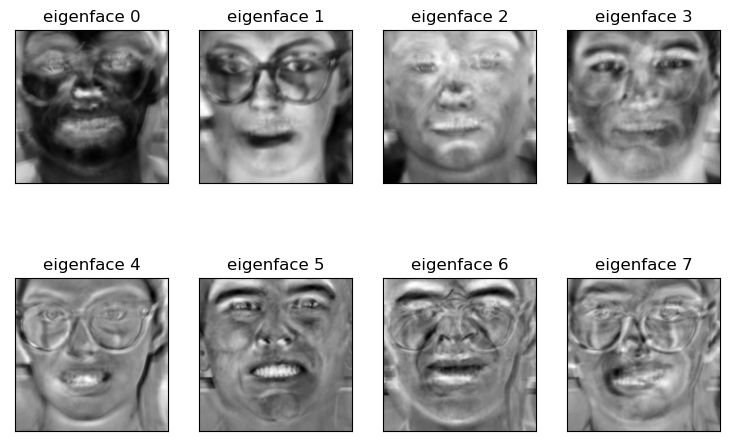

In [10]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[1])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

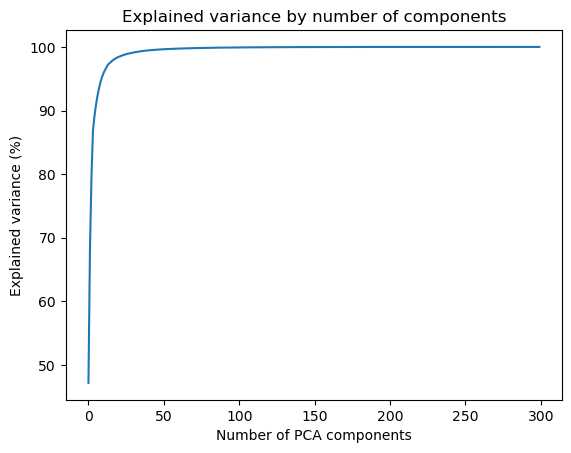

In [ ]:
'''check numb of componants for good variance'''
pca = PCA(n_components=300).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 
